In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [9]:
single_image = x_train[0]

In [10]:
single_image.shape

(28, 28)

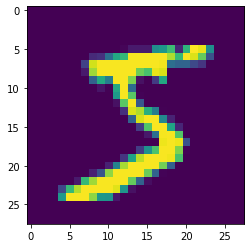

In [15]:
plt.imshow(single_image)

In [18]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
y_train.shape

(60000,)

In [21]:
y_example = to_categorical(y_train)

In [23]:
y_example.shape

(60000, 10)

In [25]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [26]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [27]:
y_cat_train = to_categorical(y_train,num_classes=10)

In [29]:
x_train = x_train/255

In [30]:
x_test = x_test/255

In [34]:
scaled_image = x_train[0]

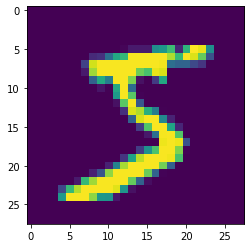

In [35]:
plt.imshow(scaled_image)

In [36]:
x_train.shape

(60000, 28, 28)

In [37]:
# batch_size,width,height,color_channels
x_train = x_train.reshape(60000,28,28,1)

In [39]:
x_test = x_test.reshape(10000,28,28,1)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [41]:
model = Sequential()

In [42]:
model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

#Output layer
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [45]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 405us/sample - loss: 0.1472 - accuracy: 0.9566 - val_loss: 0.0554 - val_accuracy: 0.9825
Epoch 2/10
60000/60000 [==============================] - 25s 421us/sample - loss: 0.0500 - accuracy: 0.9845 - val_loss: 0.0401 - val_accuracy: 0.9872
Epoch 3/10
60000/60000 [==============================] - 25s 412us/sample - loss: 0.0307 - accuracy: 0.9905 - val_loss: 0.0438 - val_accuracy: 0.9860


In [46]:
metrics = pd.DataFrame(model.history.history)

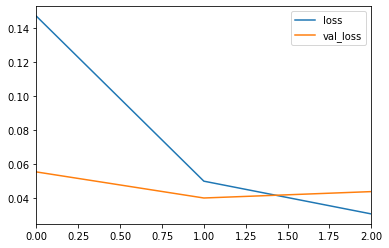

In [48]:
metrics[['loss','val_loss']].plot()

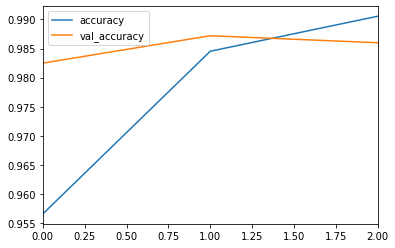

In [49]:
metrics[['accuracy','val_accuracy']].plot()

In [51]:
model.metrics_names

['loss', 'accuracy']

In [52]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.04383612832396757, 0.986]

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
predictions = model.predict_classes(x_test)

In [59]:
y_cat_test.shape

(10000, 10)

In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.95      0.99      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [61]:
print(confusion_matrix(y_test,predictions))

[[ 974    1    0    0    0    1    2    0    1    1]
 [   0 1131    0    0    0    1    2    1    0    0]
 [   3    1 1015    1    2    0    2    6    2    0]
 [   0    0    1  996    0    8    0    3    2    0]
 [   0    0    0    0  979    0    1    0    0    2]
 [   1    0    0    2    0  887    1    0    1    0]
 [   4    2    0    1    1    9  937    0    4    0]
 [   0    2    5    0    2    1    0 1015    1    2]
 [   6    1    0    0    1    4    0    3  957    2]
 [   0    2    0    0   11   19    0    4    4  969]]


In [62]:
import seaborn as sns

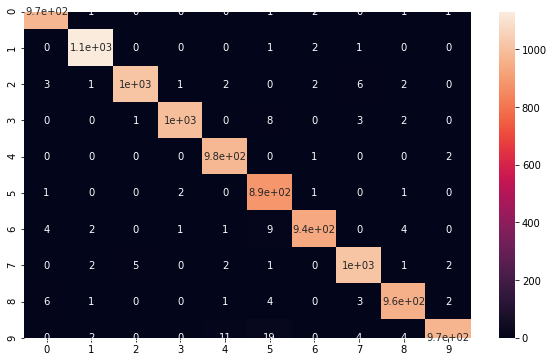

In [65]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [68]:
my_number = x_test[0]

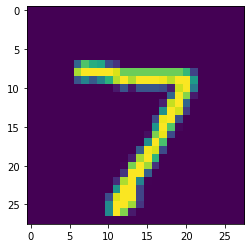

In [70]:
plt.imshow(my_number.reshape(28,28))

In [72]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([7], dtype=int64)